In [56]:
# Random Forest

In [57]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
# Data Preparation:

In [59]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [60]:
# 1. Exploratory Data Analysis (EDA):

In [61]:
# # Data Dictionary:
# RI: refractive index
# Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
# Mg: Magnesium
# AI: Aluminum
# Si: Silicon
# K : Potassium
# Ca: Calcium
# Ba: Barium
# Fe: Iron

# Type: Type of glass: (class attribute)
# 1 -- building_windows_float_processed
# 2 -- building_windows_non_float_processed
# 3 -- vehicle_windows_float_processed
# 4 -- vehicle_windows_non_float_processed (none in this database)
# 5 -- containers
# 6 -- tableware
# 7 -- headlamps


In [62]:
df.shape

(214, 10)

In [63]:
# Summary Statistics:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [64]:
# Checking for missing values:
# There are no missing values found.
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [65]:
# Target Variable is Type:
# 7 types of glasses totally:
df.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [66]:
# dtypes: float64(9), int64(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [67]:
# 2: Data Visualization:

In [68]:
# All features are numerical except type variable.
# Storing the features in a list:
numlist=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

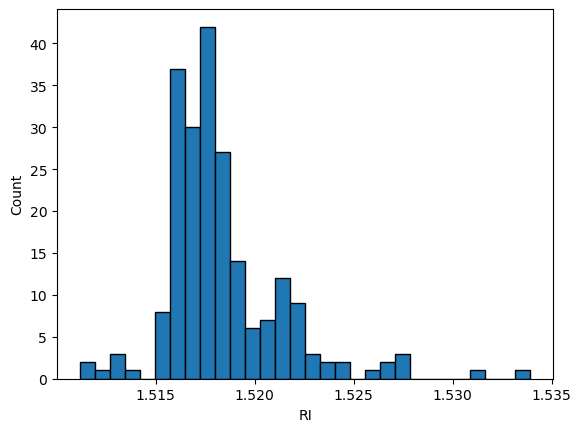

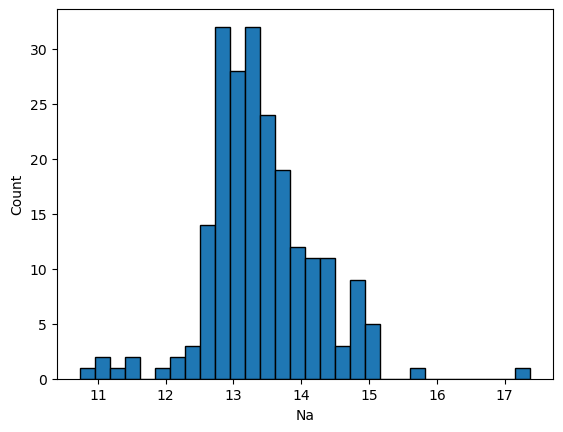

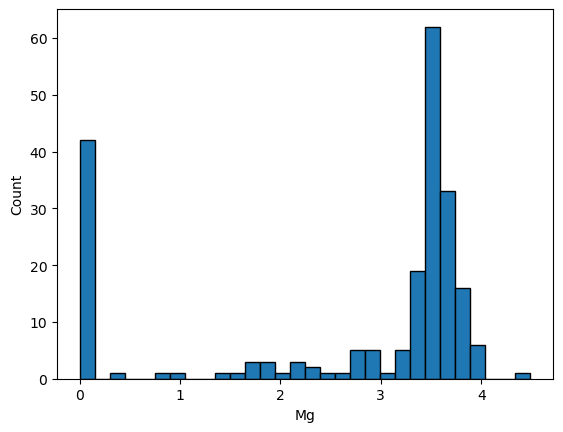

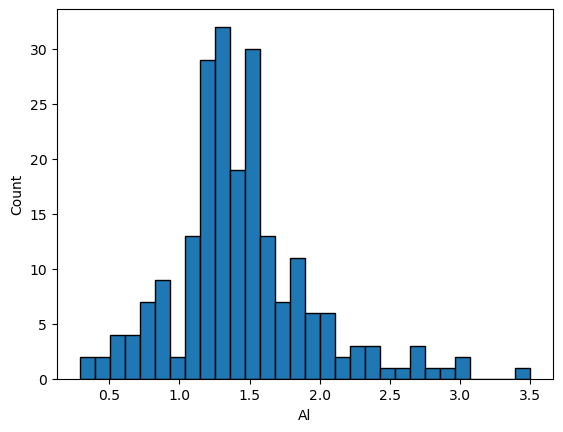

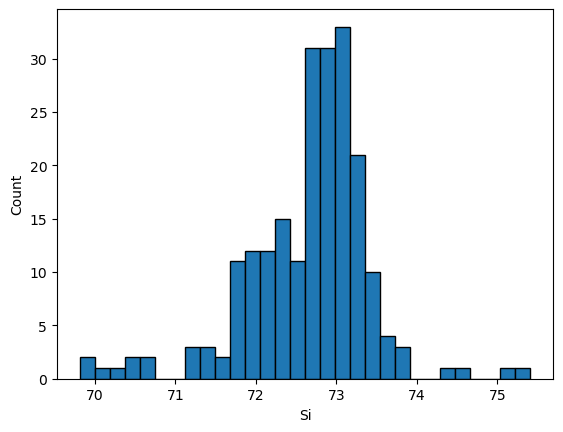

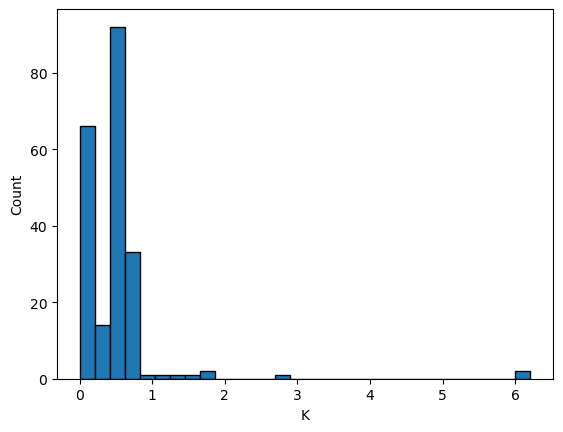

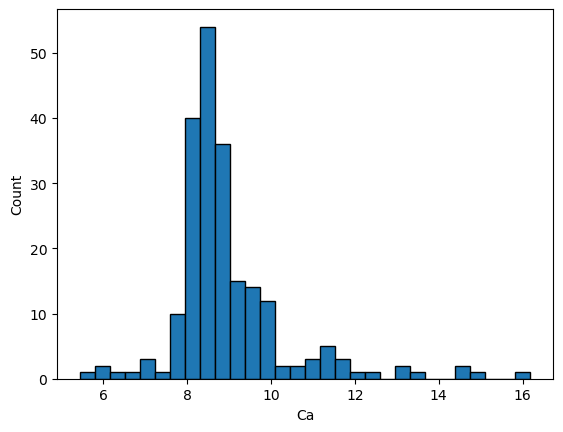

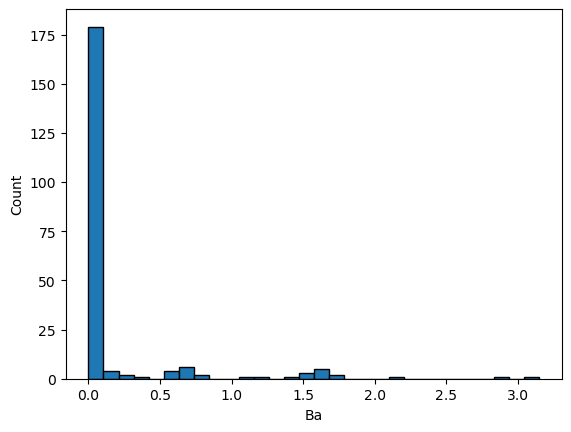

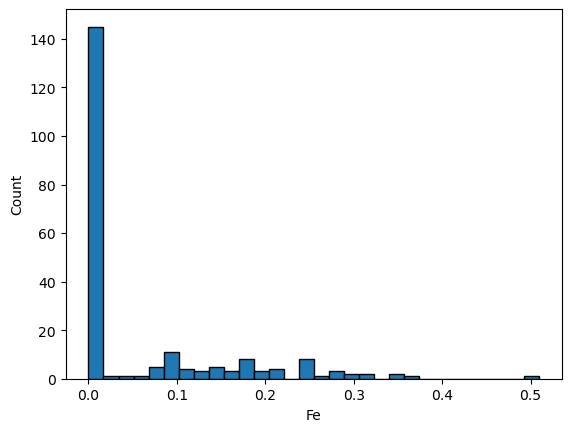

In [69]:
#Histplots for all the numerical variables:
# Summary:
# Features K,Ba,Fe seem to be positevely skewed, Mg negatively skewed and the rest are normal distributed
for i in numlist:
    plt.hist(df[i],edgecolor='black',bins=30)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.show()

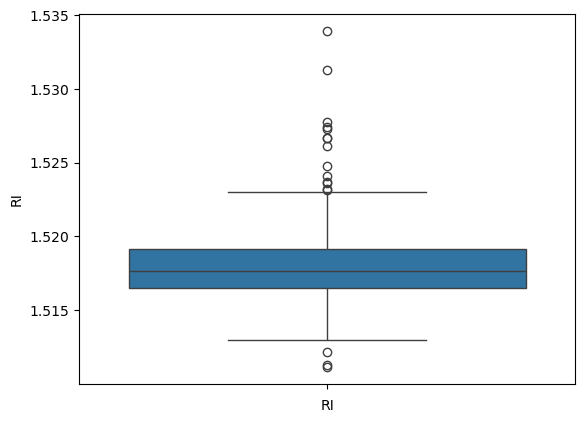

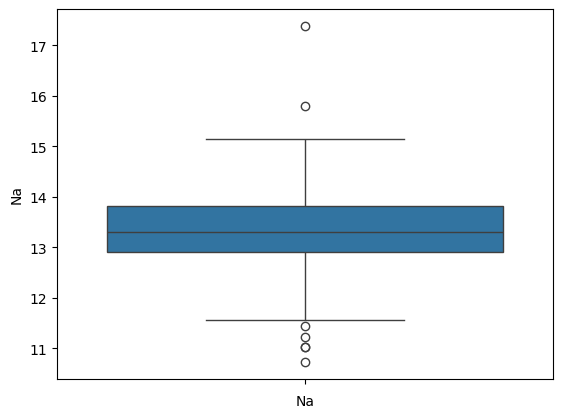

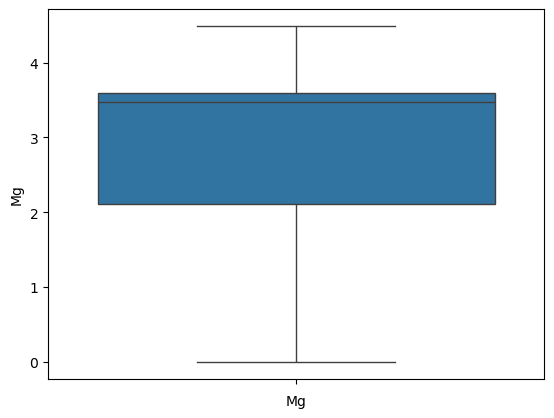

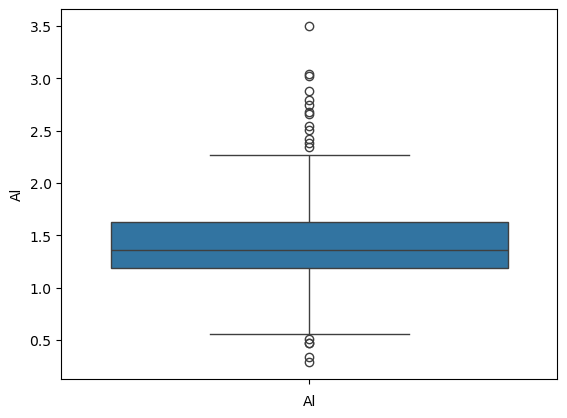

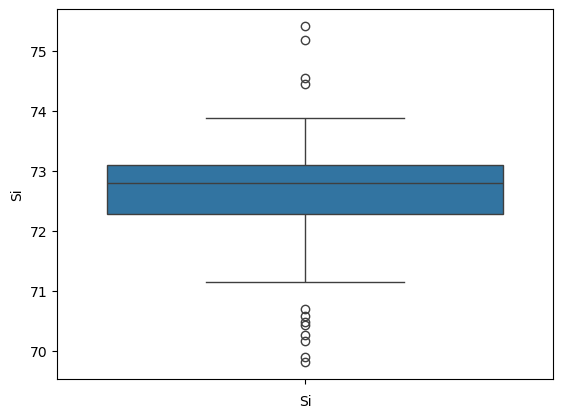

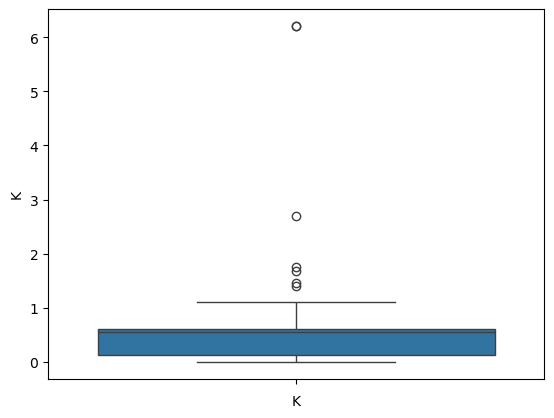

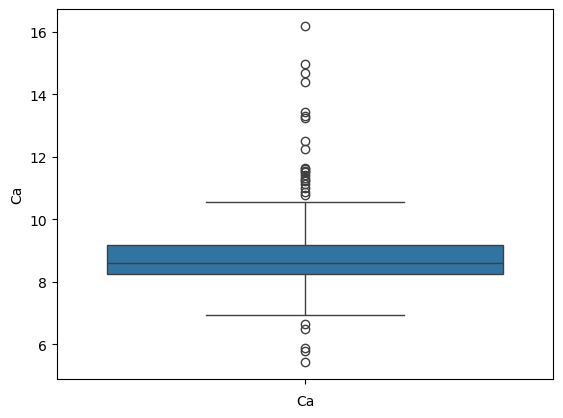

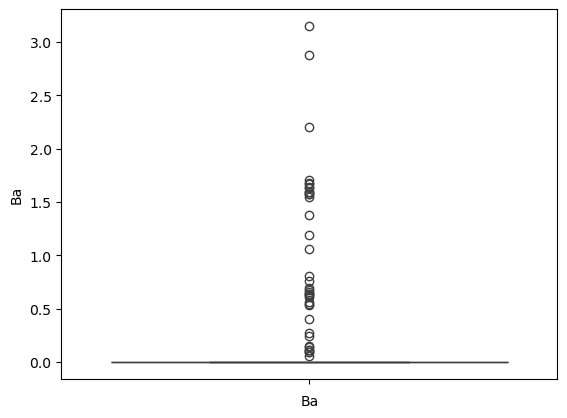

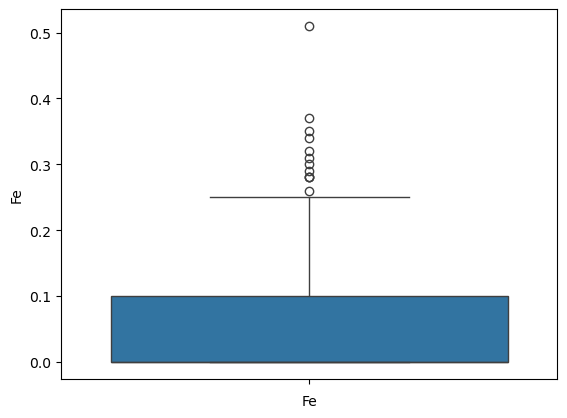

In [70]:
# Boxplots for all the numerical variables: To find outliers:
for i in numlist:
    sns.boxplot(df[i])
    plt.xlabel(f'{i}')
    plt.show() 

<Axes: >

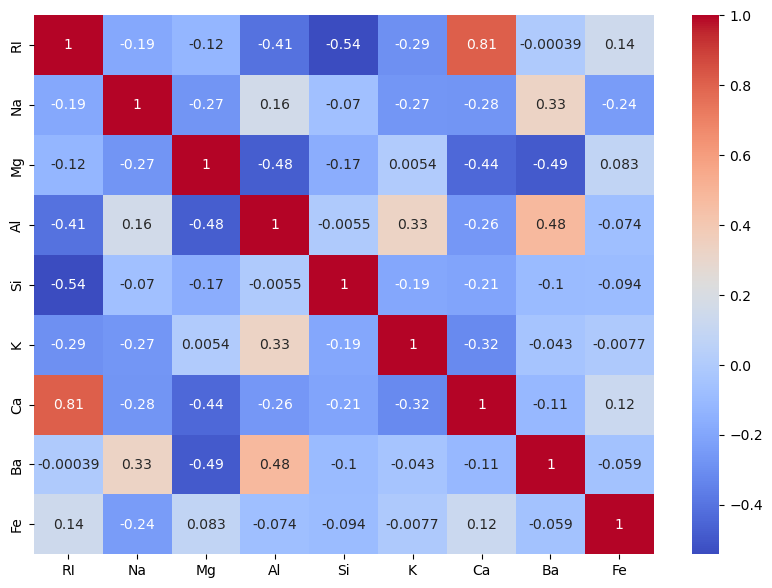

In [71]:
# Heatmap to find correlation between features:
# Summary:
# Barium and Aluminium also show some correlation.
# Calcium and Refractive index seem to be related: which means the more the calcium in glass the higher the refractive index of the glass.
plt.figure(figsize=(10,7))
sns.heatmap(df[numlist].corr(),annot=True, cmap="coolwarm")

In [72]:
# 3: Data Preprocessing
# Normalization of the data: Since all the distributions are not normal we go with minmax scaler
numdf=df[numlist]
from sklearn.preprocessing import MinMaxScaler

In [73]:
mmsc=MinMaxScaler()
mmsc.fit(numdf)

MinMaxScaler()

In [74]:
# Final normalized scalednumdf:
scalednum=mmsc.transform(numdf)
scalednumdf=pd.DataFrame(scalednum,columns=numdf.columns)
scalednumdf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [75]:
# 4: Random Forest Model Implementation:

In [76]:
# Building the model
x=scalednumdf
y=df['Type']

In [77]:
# Splitting the dataset into the Training set and Test set using 80:20 split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,random_state=25)

In [78]:
# Fitting Training set to decision tree
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [79]:
# Predicting the test set:
ypred=rfc.predict(xtest)
print(ypred)

[2 1 2 1 5 5 2 1 2 7 2 6 5 1 2 6 2 1 3 2 2 2 2 2 2 2 2 2 7 1 1 3 7 1 7 1 7
 2 1 1 2 2 7]


In [80]:
# Metrics testing:
# We have gotten very good performance in the metrics averaging around 82% accuracy score

In [81]:
# R2 Score:
rfc.score(xtest,ytest)

0.7906976744186046

In [82]:
# Precision Score:
from sklearn.metrics import precision_score
precision_score(ytest, ypred, average='micro')

0.7906976744186046

In [83]:
# Recall Score:
from sklearn.metrics import recall_score
recall_score(ytest, ypred, average='micro')

0.7906976744186046

In [84]:
# F1 Score:
from sklearn.metrics import f1_score
f1_score(ytest, ypred, average='weighted')

0.7997977755308392

In [85]:
# ROC-AUC Score:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear").fit(x, y)
roc_auc_score(y, clf.predict_proba(x), multi_class='ovr')

0.8687487845915646

Text(95.72222222222221, 0.5, 'Truth')

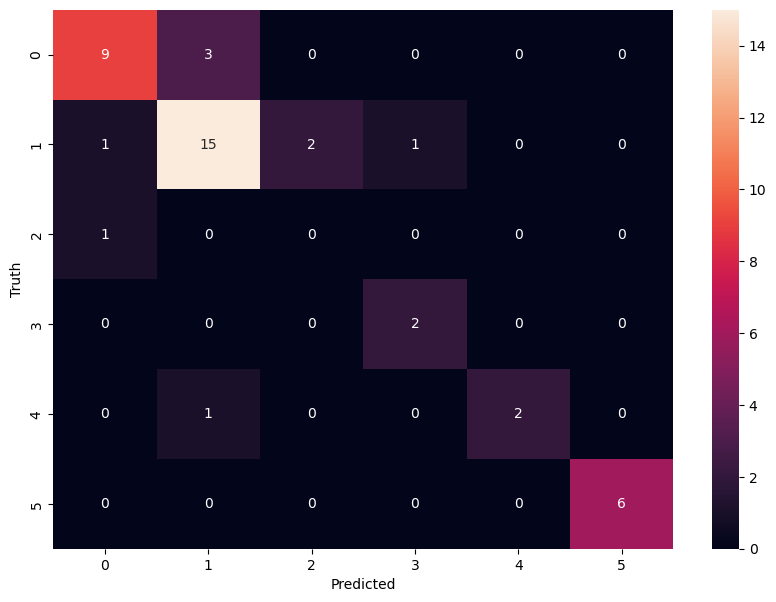

In [86]:
# Visualization of the predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
# 5: Bagging and Boosting Methods:

In [88]:
# Bagging:
from sklearn.ensemble import BaggingClassifier

In [89]:
bag_model = BaggingClassifier(
estimator=RandomForestClassifier(),
n_estimators=100,
max_samples=0.8,
oob_score=True,
random_state=10)

In [90]:
# Applying fit:
bag_model.fit(xtrain, ytrain)

BaggingClassifier(estimator=RandomForestClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=10)

In [91]:
# Make predictions
y_pred_bagging = bag_model.predict(xtest)

In [92]:
# Metrics:
# Better score compared to standalone randomtree classifier(81 to 83)

from sklearn.metrics import accuracy_score, classification_report
print("Bagging Classifier Accuracy:", accuracy_score(ytest, y_pred_bagging))
print("Classification Report:\n", classification_report(ytest, y_pred_bagging))

Bagging Classifier Accuracy: 0.8372093023255814
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.75      0.78        12
           2       0.81      0.89      0.85        19
           3       0.00      0.00      0.00         1
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.72      0.72      0.71        43
weighted avg       0.83      0.84      0.83        43



D:\Coding\DS\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Coding\DS\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Coding\DS\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [93]:
# Boosting:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
boost_model = AdaBoostClassifier(
estimator=RandomForestClassifier(),
n_estimators=50,
random_state=42)

In [95]:
# Applying fit:
boost_model.fit(xtrain, ytrain)

D:\Coding\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(), random_state=42)

In [96]:
# Make predictions
y_pred_boosting=boost_model.predict(xtest)

In [97]:
# Metrics:
# Worse score compared to standalone randomtree classifier(81 to 79)

print("Boosting Classifier Accuracy:", accuracy_score(ytest, y_pred_boosting))
print("Classification Report:\n", classification_report(ytest, y_pred_boosting))

Boosting Classifier Accuracy: 0.7906976744186046
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.83      0.80        12
           2       0.88      0.74      0.80        19
           3       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.69      0.71      0.68        43
weighted avg       0.83      0.79      0.80        43



In [98]:
# Conclusion:
# The bagging model was better in improving the accuracy of random forest algorithm compared to the boosting model.